In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

# <center> Домашнее задание №1 </center>

## <center> Моделирование движения тела в постоянном поле силы тяжести </center>

Тело массы m вылетает из точки (0,0) со скоростью $ V_0 $ под углом $ \alpha $ к оси X и движется в постоянном поле силы тяжести $ F_{gz} = -mg $, испытывая силу трения $ F_{fr} = - \beta(\upsilon)(v / \upsilon) = - \beta(\upsilon)(e_{x} \frac{\upsilon_{x}}\upsilon + e_{z} \frac{\upsilon_{z}}\upsilon)$

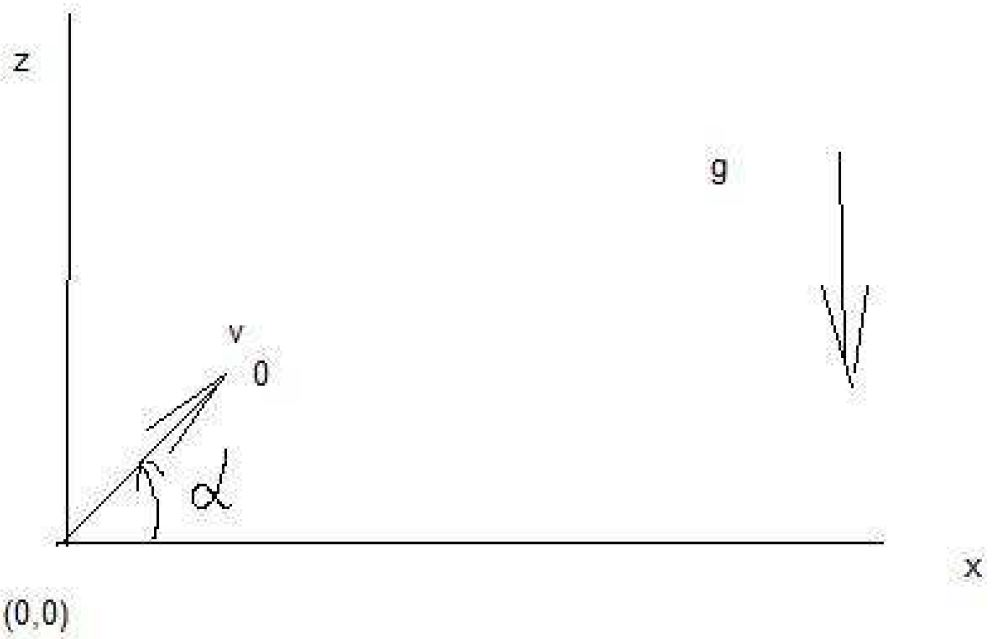

In [2]:
from IPython.display import Image
Image(filename='task_image.JPG', width=400, height=400)

### 1) Написать функцию вычисления аналитического решения системы уравнения движения частицы. Нарисовать графики аналитических траекторий Z(x) и X(t), Z(t), Vx(t), Vz(t)

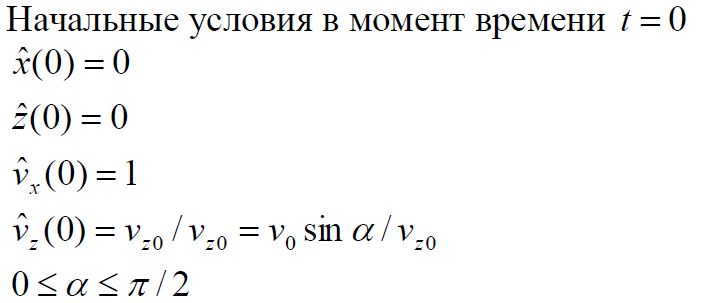

In [3]:
from IPython.display import Image
Image(filename='1_1part_equations.JPG', width=400, height=400)

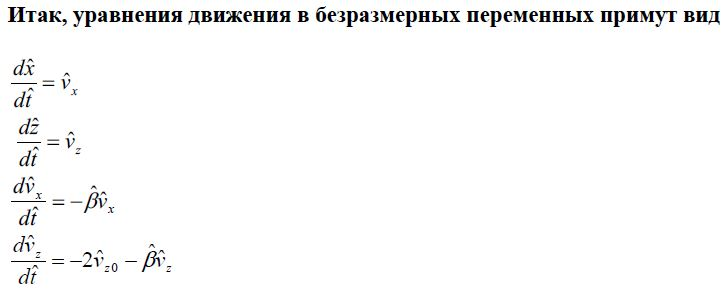

In [4]:
Image(filename='1_2part_equations.JPG', width=800, height=800)

In [5]:
# Аналитическое решение
def analitical_trajectory (x_0, z_0, V0x, V0z, beta_0, m, t):
    g = 9.8      # ускорение свободного падения
    Vx_0 = 1
    Vz_0 = V0z / V0x
    beta = 2 * beta_0 * V0z / m * g
    if beta != 0:
        x = x_0 + Vx_0 / beta * (1 - math.exp(-beta * t))
        z = z_0 + Vz_0 / beta * (1 + 2 / beta) * (1 - math.exp(-beta * t)) - 2 * Vz_0 / beta * t
        Vx = Vx_0 * math.exp(-beta * t)
        Vz = Vz_0 * math.exp(-beta * t) * (1 + 2 / beta) - 2 * Vz_0 / beta
    elif beta == 0:
        x = x_0 + Vx_0 * t
        z = z_0 + Vz_0 * (t - math.pow(t, 2))
        Vx = Vx_0
        Vz = Vz_0 - 2 * t
    return (x, z, Vx, Vz)        

In [6]:
# Отсутствует сила трения
x_0 = 0         # положение тела в момент времени t=0 по оси X
z_0 = 0         # положение тела в момент времени t=0 по оси Z
beta_0 = 0      # коэффициент трения
m = 10          # масса тела
points = 101

V0x = 1         # проекция начальной на скорости на ось X
V0z = 1         # проекция начальной на скорости на ось Z

x_1 = np.zeros(points)
z_1 = np.zeros(points)
Vx_1 = np.zeros(points)
Vz_1 = np.zeros(points)

for t in range(points):
    (x_1[t], z_1[t], Vx_1[t], Vz_1[t]) = analitical_trajectory(x_0, z_0, V0x, V0z, beta_0, m, t/(points-1))

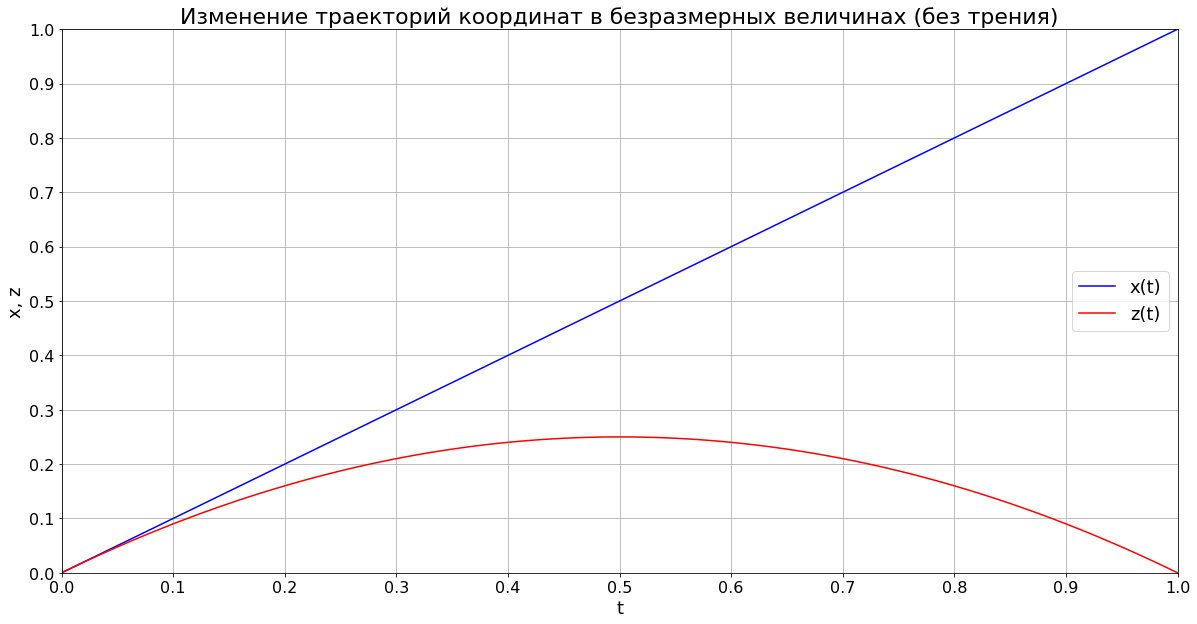

In [7]:
# Графики траекторий координат (x(t), z(t)) без трения
xlim_min = 0.0
xlim_max = 1.0
ylim_min = 0.0
ylim_max = 1.0
t = range(points)
t = [t[i]/(points-1) for i in range(len(t))]
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Изменение траекторий координат в безразмерных величинах (без трения)', fontsize = 22)
plt.xlabel('t', fontsize = 18)
plt.ylabel('x, z', fontsize = 18)
plt.grid(True)
plt.plot(t, x_1, c = 'blue')
plt.plot(t, z_1, c = 'red')
plt.legend(['x(t)', 'z(t)'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 11), fontsize = 16);

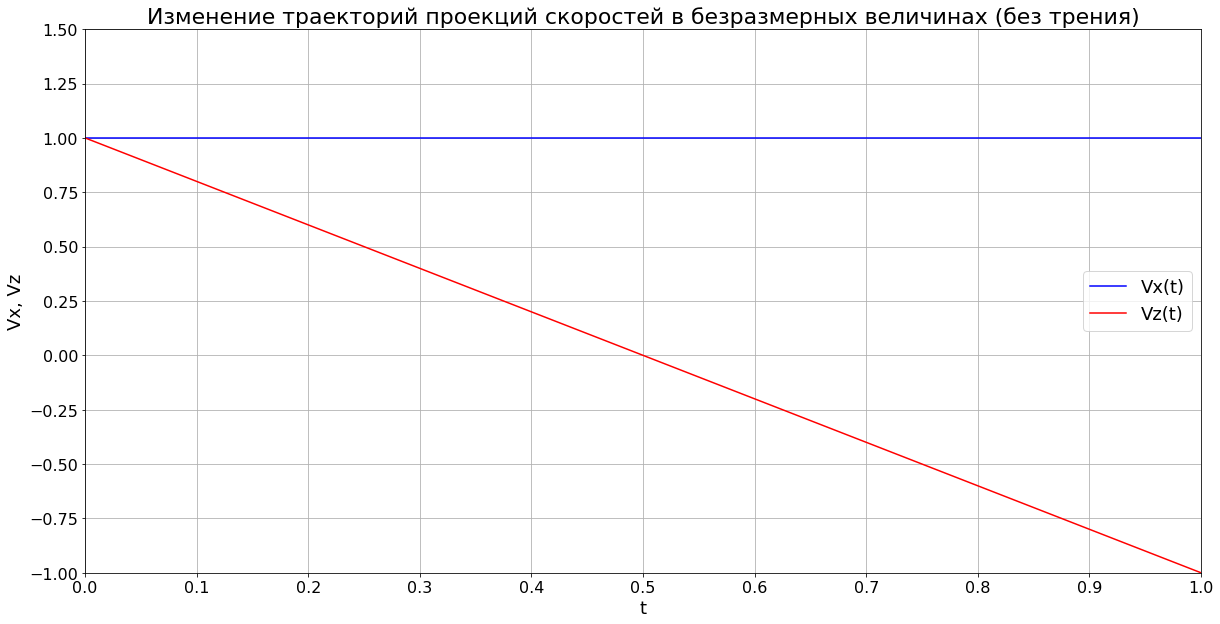

In [8]:
# Графики траекторий скоростей Vx(t), Vz(t)) без трения
xlim_min = 0.0
xlim_max = 1.0
ylim_min = -1.0
ylim_max = 1.5
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Изменение траекторий проекций скоростей в безразмерных величинах (без трения)', fontsize = 22)
plt.xlabel('t', fontsize = 18)
plt.ylabel('Vx, Vz', fontsize = 18)
plt.grid(True)
plt.plot(t, Vx_1, c = 'blue')
plt.plot(t, Vz_1, c = 'red')
plt.legend(['Vx(t)', 'Vz(t)'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 11), fontsize = 16);

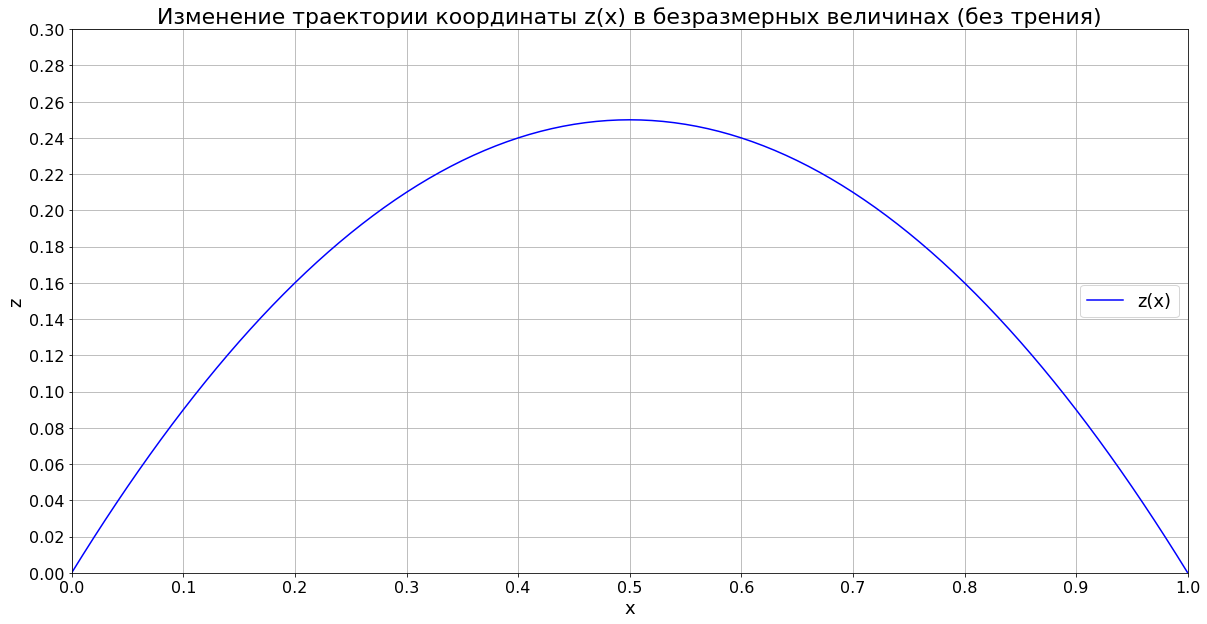

In [9]:
# График траектории координаты z(x) без трения
xlim_min = 0.0
xlim_max = 1.0
ylim_min = 0.0
ylim_max = 0.3
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Изменение траектории координаты z(x) в безразмерных величинах (без трения)', fontsize = 22)
plt.xlabel('x', fontsize = 18)
plt.ylabel('z', fontsize = 18)
plt.grid(True)
plt.plot(x_1, z_1, c = 'blue')
plt.legend(['z(x)'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 16), fontsize = 16);

In [10]:
# Присутсвует сила трения
x_0 = 0         # положение тела в момент времени t=0 по оси X
z_0 = 0         # положение тела в момент времени t=0 по оси Z
beta_0 = 0.1      # коэффициент трения
m = 10          # масса тела
points = 101

V0x = 1         # проекция начальной на скорости на ось X
V0z = 1         # проекция начальной на скорости на ось Z

x_2 = np.zeros(points)
z_2 = np.zeros(points)
Vx_2 = np.zeros(points)
Vz_2 = np.zeros(points)

for t in range(points):
    (x_2[t], z_2[t], Vx_2[t], Vz_2[t]) = analitical_trajectory(x_0, z_0, V0x, V0z, beta_0, m, t/(points-1))

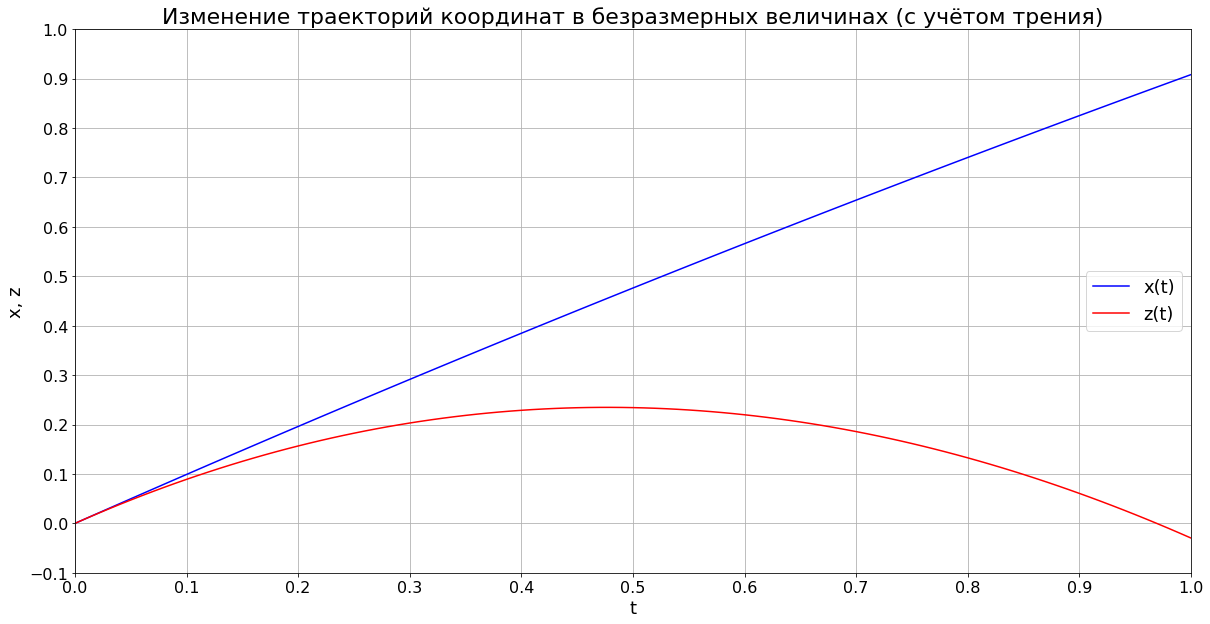

In [11]:
# Графики траекторий координат x(t), z(t) с учётом трения
xlim_min = 0.0
xlim_max = 1.0
ylim_min = -0.1
ylim_max = 1.0
t = range(points)
t = [t[i]/(points-1) for i in range(len(t))]
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Изменение траекторий координат в безразмерных величинах (с учётом трения)', fontsize = 22)
plt.xlabel('t', fontsize = 18)
plt.ylabel('x, z', fontsize = 18)
plt.grid(True)
plt.plot(t, x_2, c = 'blue')
plt.plot(t, z_2, c = 'red')
plt.legend(['x(t)', 'z(t)'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 12), fontsize = 16);

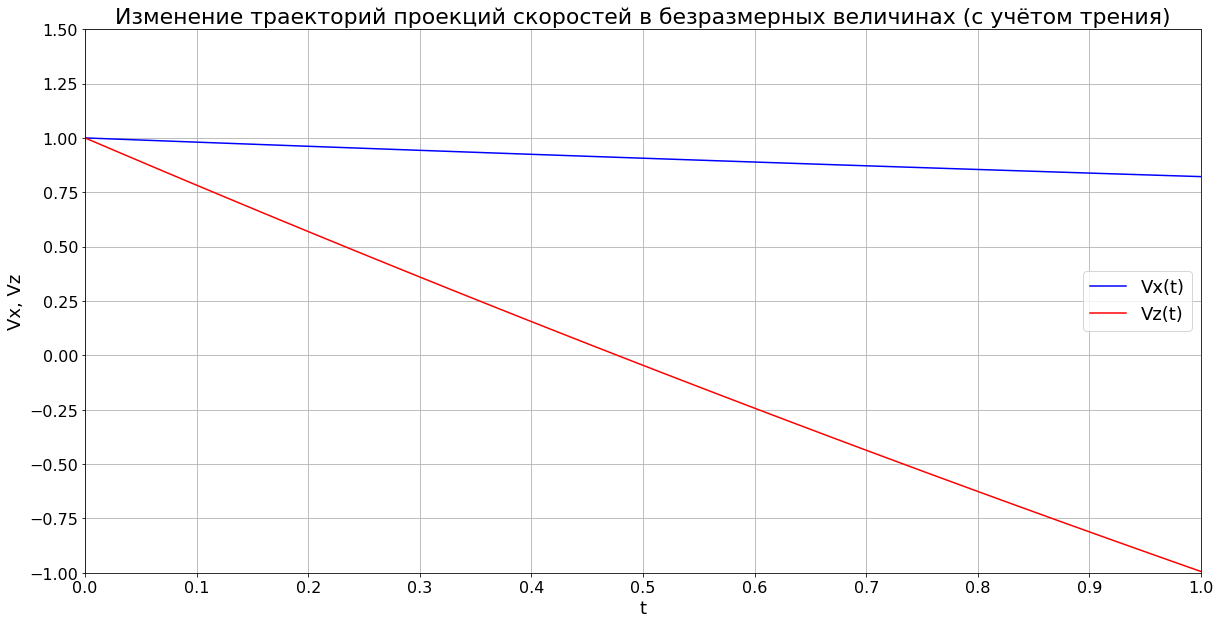

In [12]:
# Графики траекторий скоростей Vx(t), Vz(t) с учётом трения
xlim_min = 0.0
xlim_max = 1.0
ylim_min = -1.0
ylim_max = 1.5
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Изменение траекторий проекций скоростей в безразмерных величинах (с учётом трения)', fontsize = 22)
plt.xlabel('t', fontsize = 18)
plt.ylabel('Vx, Vz', fontsize = 18)
plt.grid(True)
plt.plot(t, Vx_2, c = 'blue')
plt.plot(t, Vz_2, c = 'red')
plt.legend(['Vx(t)', 'Vz(t)'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 11), fontsize = 16);

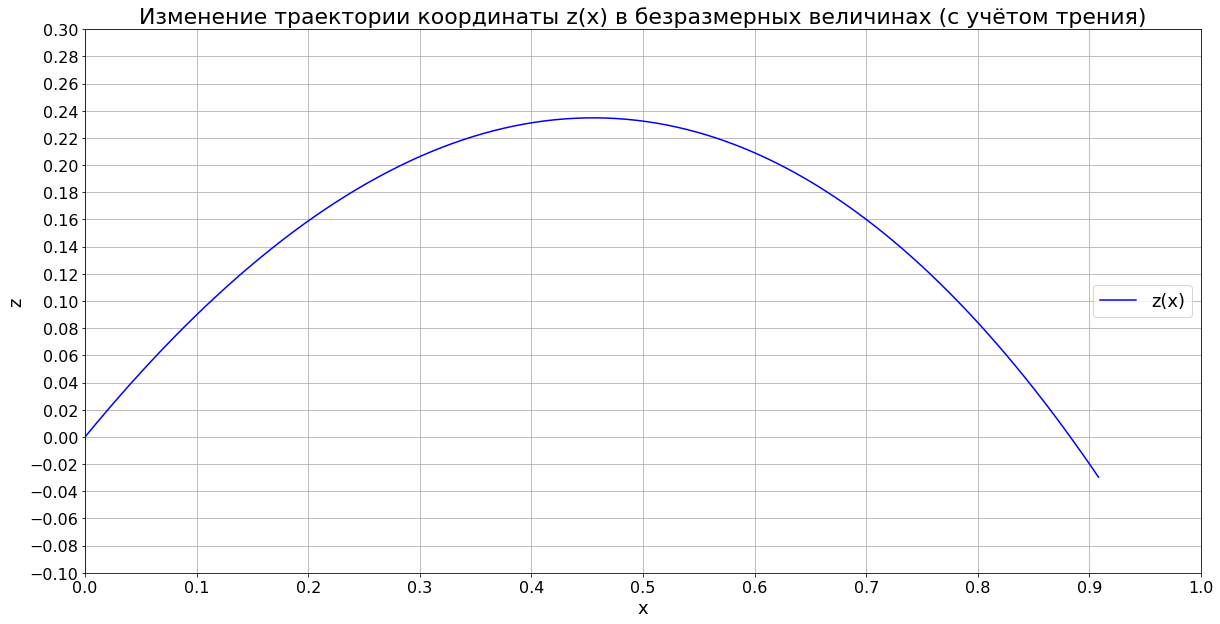

In [13]:
# График траектории координаты z(x) с учётом трения
xlim_min = 0.0
xlim_max = 1.0
ylim_min = -0.1
ylim_max = 0.3
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Изменение траектории координаты z(x) в безразмерных величинах (с учётом трения)', fontsize = 22)
plt.xlabel('x', fontsize = 18)
plt.ylabel('z', fontsize = 18)
plt.grid(True)
plt.plot(x_2, z_2, c = 'blue')
plt.legend(['z(x)'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 21), fontsize = 16);

### 2) Написать программу для решения уравнений движения частицы неявной схемой. Нарисовать графики аналитических траекторий Z(x) и X(t), Vx(t), Vz(t)

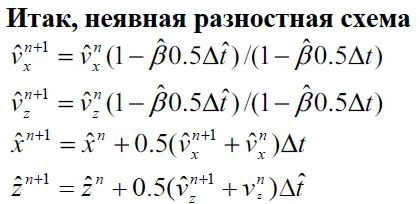

In [14]:
from IPython.display import Image
Image(filename='2part_equations.JPG', width=400, height=400)

In [15]:
# Неявная разностная схема для Vx
def implicitSchemaVx(Vx_0, tau, T, beta):
    n = int(round(T/tau))
    t = np.linspace(0, n * tau, n + 1)
    Vx = np.zeros(n + 1)
    Vx[0] = Vx_0
    for i in range(n):
        Vx[i + 1] = Vx[i] * (1 - beta * 0.5 * tau) / (1 + beta * 0.5 * tau)
    return Vx, t

In [16]:
# Неявная разностная схема для Vz
def implicitSchemaVz(Vz0, tau, T, beta):
    n = int(round(T/tau))
    t = np.linspace(0, n * tau, n + 1)
    Vz = np.zeros(n + 1)
    Vz[0] = Vz0
    for i in range(n):
        Vz[i + 1] = (Vz[i] * (1 - beta * 0.5 * tau) - 2 * Vz0 * tau) / (1 + beta * 0.5 * tau)
    return Vz, t

In [17]:
# Неявная разностная схема для координат
def implicitSchemaCoordinates(coord_0, V, tau, T):
    n = int(round(T/tau))
    t = np.linspace(0, n * tau, n + 1)
    coord = np.zeros(n + 1)
    coord[0] = coord_0
    for i in range(n):
        coord[i + 1] = coord[i] + 0.5 * (V[i + 1] + V[i]) * tau
    return coord, t

In [18]:
# Отсутствует сила трения
beta_0 = 0
V0_x = 1
V0_z = 1
m = 1

x_0 = 0
z_0 = 0
Vx_0 = 1
g = 9.8
Vz_0 = V0_z / V0_x
beta = beta_0 * 2 * V0_z / (m * g)

In [19]:
(Vx_3, t) = implicitSchemaVx(Vx_0, 0.01, 1, beta)
(Vz_3, t) = implicitSchemaVz(Vz_0, 0.01, 1, beta)
(x_3, t) = implicitSchemaCoordinates(x_0, Vx_3, 0.01, 1)
(z_3, t) = implicitSchemaCoordinates(z_0, Vz_3, 0.01, 1)

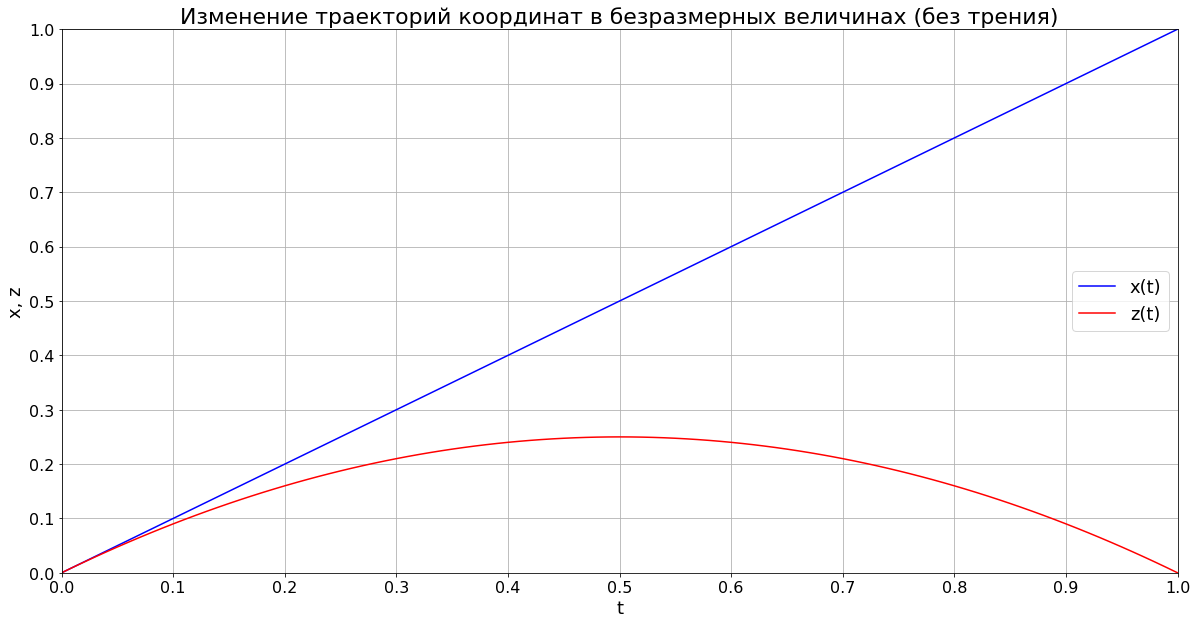

In [20]:
# Графики траекторий координат x(t), z(t) без трения
xlim_min = 0.0
xlim_max = 1.0
ylim_min = 0.0
ylim_max = 1.0
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Изменение траекторий координат в безразмерных величинах (без трения)', fontsize = 22)
plt.xlabel('t', fontsize = 18)
plt.ylabel('x, z', fontsize = 18)
plt.grid(True)
plt.plot(t, x_3, c = 'blue')
plt.plot(t, z_3, c = 'red')
plt.legend(['x(t)', 'z(t)'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 11), fontsize = 16);

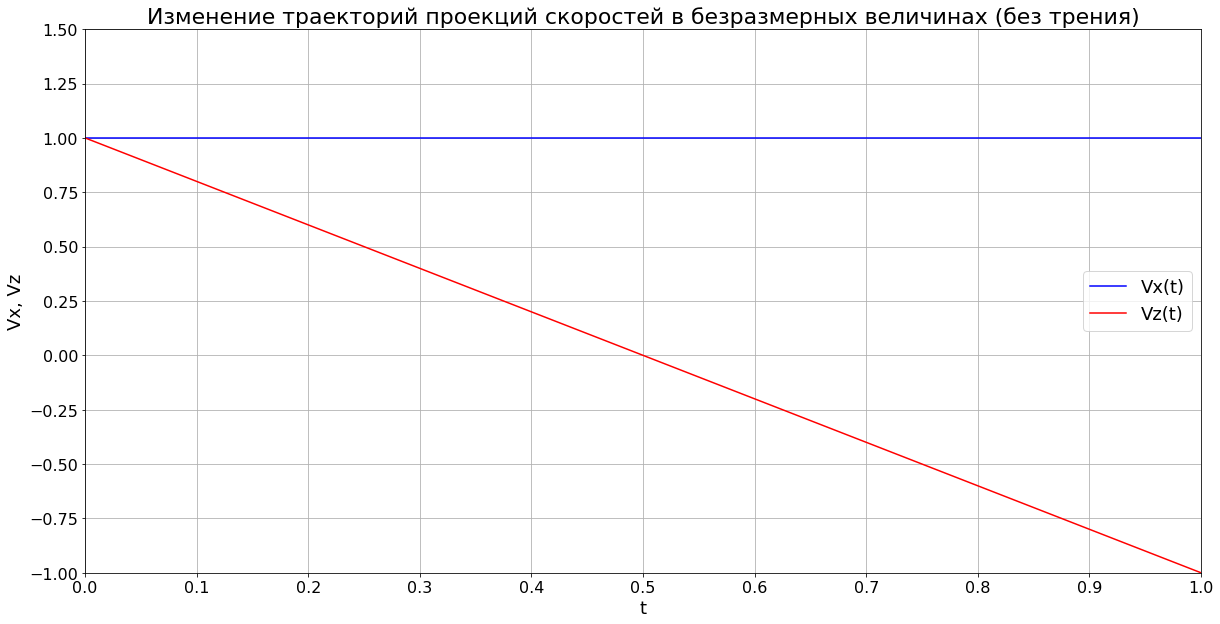

In [21]:
# Графики траекторий скоростей Vx(t), Vz(t)) без трения
xlim_min = 0.0
xlim_max = 1.0
ylim_min = -1.0
ylim_max = 1.5
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Изменение траекторий проекций скоростей в безразмерных величинах (без трения)', fontsize = 22)
plt.xlabel('t', fontsize = 18)
plt.ylabel('Vx, Vz', fontsize = 18)
plt.grid(True)
plt.plot(t, Vx_3, c = 'blue')
plt.plot(t, Vz_3, c = 'red')
plt.legend(['Vx(t)', 'Vz(t)'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 11), fontsize = 16);

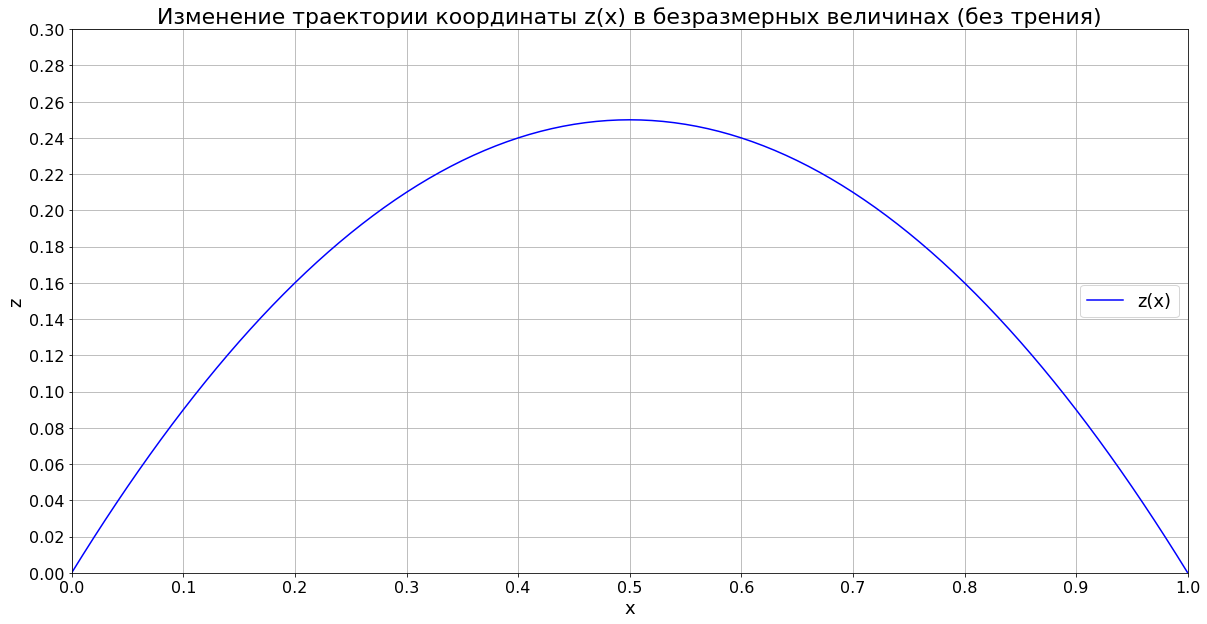

In [22]:
# График траектории координаты z(x) без трения
xlim_min = 0.0
xlim_max = 1.0
ylim_min = 0.0
ylim_max = 0.3
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Изменение траектории координаты z(x) в безразмерных величинах (без трения)', fontsize = 22)
plt.xlabel('x', fontsize = 18)
plt.ylabel('z', fontsize = 18)
plt.grid(True)
plt.plot(x_3, z_3, c = 'blue')
plt.legend(['z(x)'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 16), fontsize = 16);

In [23]:
# Присутсвует сила трения
beta_0 = 0.1
V0_x = 1
V0_z = 1
m = 1

x_0 = 0
z_0 = 0
Vx_0 = 1
g = 9.8
Vz_0 = V0_z / V0_x
beta = 2 * beta_0 * V0_z / m * g

In [24]:
(Vx_4, t) = implicitSchemaVx(Vx_0, 0.01, 1, beta_0)
(Vz_4, t) = implicitSchemaVz(Vz_0, 0.01, 1, beta_0)
(x_4, t) = implicitSchemaCoordinates(x_0, Vx_4, 0.01, 1)
(z_4, t) = implicitSchemaCoordinates(z_0, Vz_4, 0.01, 1)

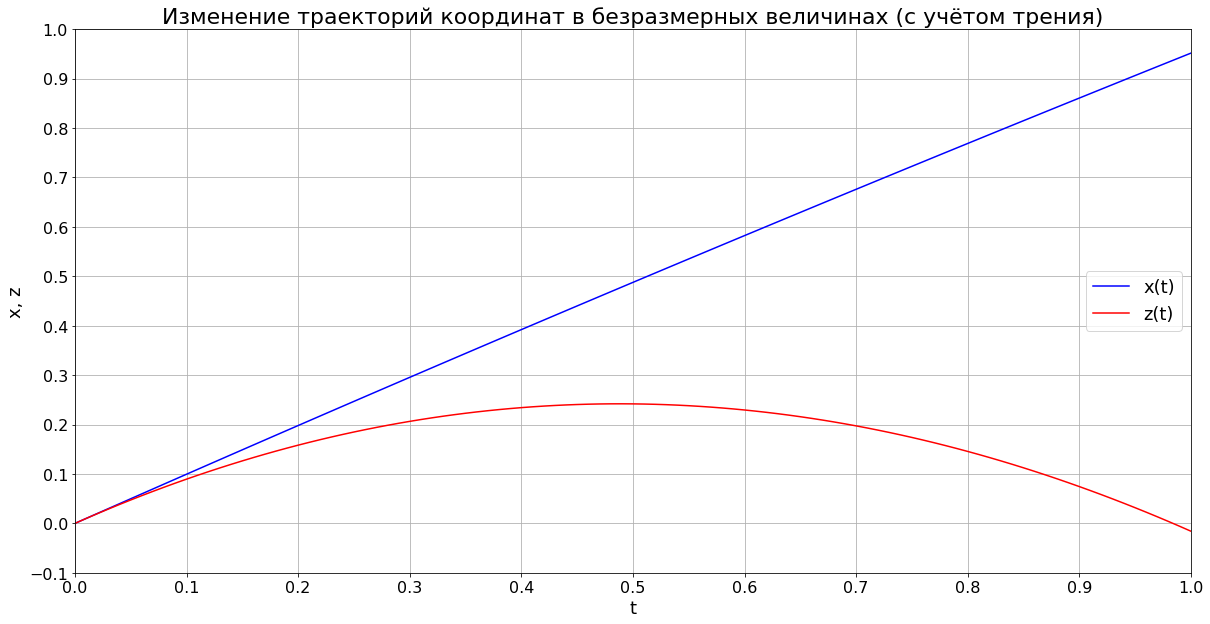

In [25]:
# Графики траекторий координат x(t), z(t) с учётом трения
xlim_min = 0.0
xlim_max = 1.0
ylim_min = -0.1
ylim_max = 1.0
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Изменение траекторий координат в безразмерных величинах (с учётом трения)', fontsize = 22)
plt.xlabel('t', fontsize = 18)
plt.ylabel('x, z', fontsize = 18)
plt.grid(True)
plt.plot(t, x_4, c = 'blue')
plt.plot(t, z_4, c = 'red')
plt.legend(['x(t)', 'z(t)'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 12), fontsize = 16);

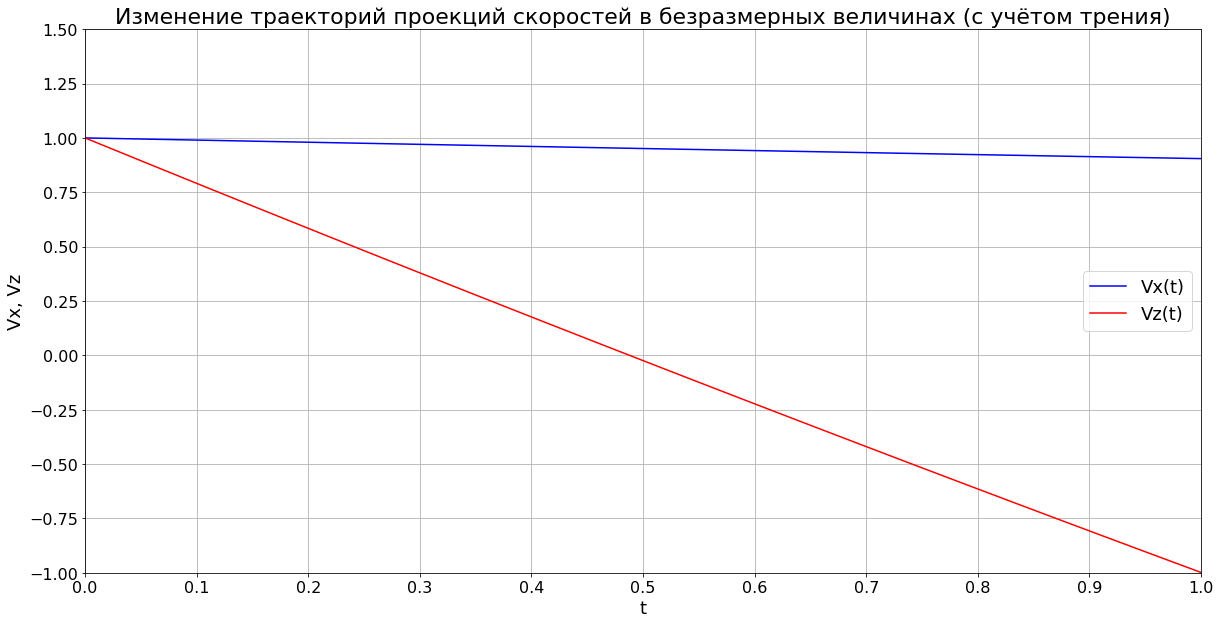

In [26]:
# Графики траекторий скоростей Vx(t), Vz(t)) с учётом трения
xlim_min = 0.0
xlim_max = 1.0
ylim_min = -1.0
ylim_max = 1.5
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Изменение траекторий проекций скоростей в безразмерных величинах (с учётом трения)', fontsize = 22)
plt.xlabel('t', fontsize = 18)
plt.ylabel('Vx, Vz', fontsize = 18)
plt.grid(True)
plt.plot(t, Vx_4, c = 'blue')
plt.plot(t, Vz_4, c = 'red')
plt.legend(['Vx(t)', 'Vz(t)'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 11), fontsize = 16);

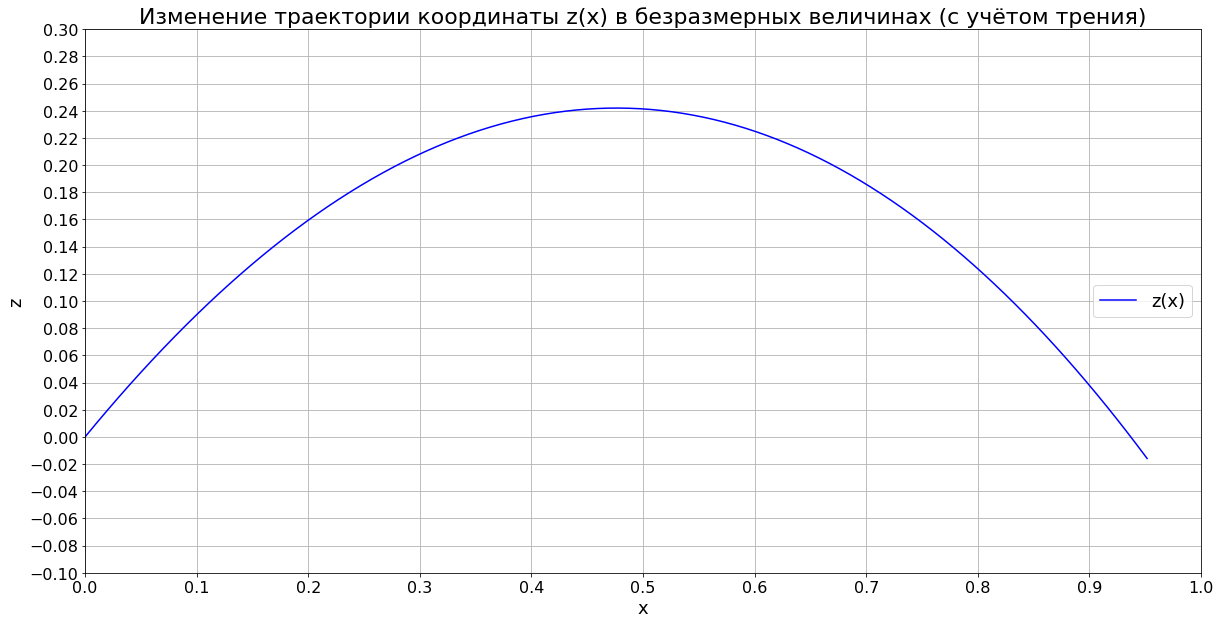

In [27]:
# График траектории координаты z(x) с учётом трения
xlim_min = 0.0
xlim_max = 1.0
ylim_min = -0.1
ylim_max = 0.3
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Изменение траектории координаты z(x) в безразмерных величинах (с учётом трения)', fontsize = 22)
plt.xlabel('x', fontsize = 18)
plt.ylabel('z', fontsize = 18)
plt.grid(True)
plt.plot(x_4, z_4, c = 'blue')
plt.legend(['z(x)'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 21), fontsize = 16);

### 3) Вычислить и нарисовать графики $\delta x(t)$, $\delta z(t)$, $\delta V_x(t)$, $\delta V_z(t)$ точности численного решения от времени

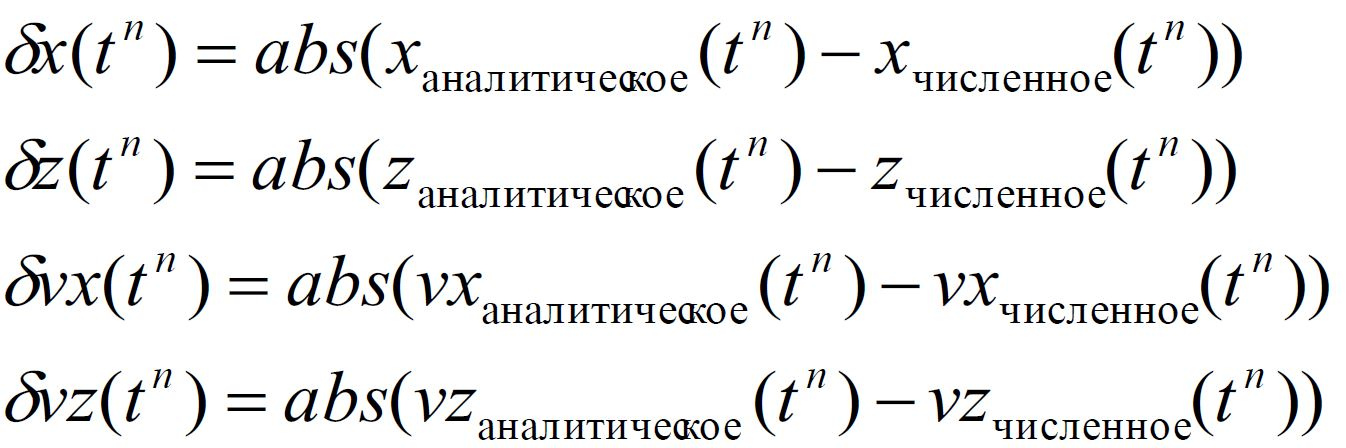

In [28]:
from IPython.display import Image
Image(filename='3part_equations.JPG', width=400, height=400)

In [29]:
deltaX = []
deltaZ = []
deltaVx = []
deltaVz = []
for t in range(points):
    deltaX.append((abs(x_2[t] - x_4[t])))
    deltaZ.append((abs(z_2[t] - z_4[t])))
    deltaVx.append((abs(Vx_2[t] - Vx_4[t])))
    deltaVz.append((abs(Vz_2[t] - Vz_4[t])))

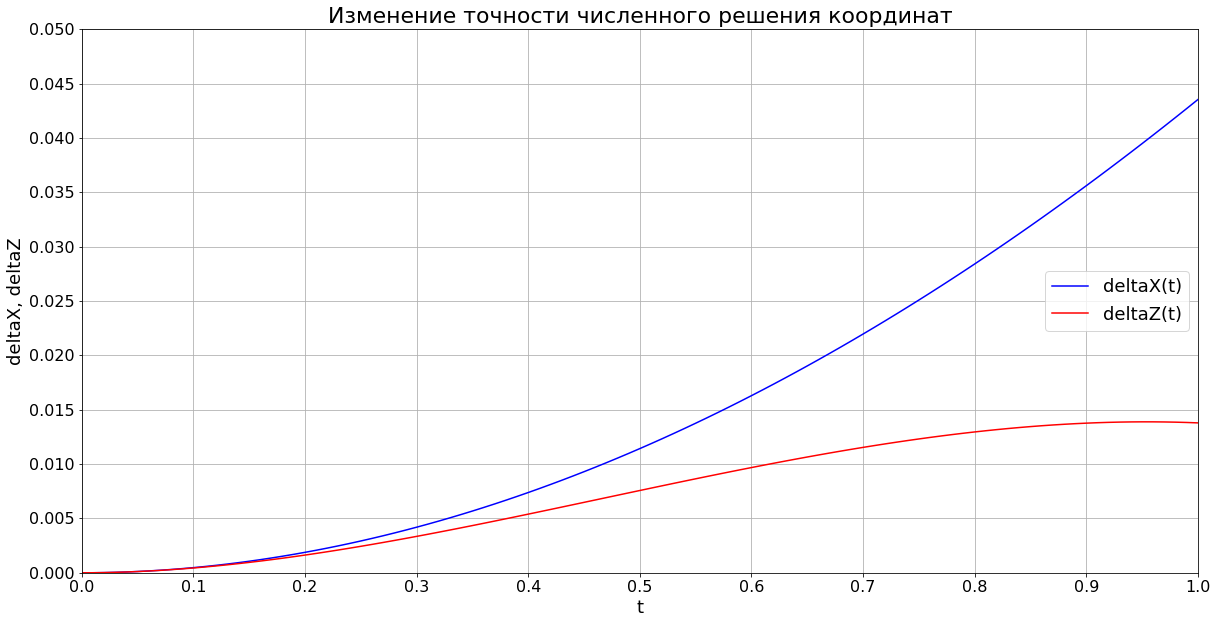

In [30]:
# Графики точности численного решения координат x(t), z(t)
xlim_min = 0.0
xlim_max = 1.0
ylim_min = 0.0
ylim_max = 0.05
t = range(points)
t = [t[i]/(points-1) for i in range(len(t))]
#print(x)
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Изменение точности численного решения координат', fontsize = 22)
plt.xlabel('t', fontsize = 18)
plt.ylabel('deltaX, deltaZ', fontsize = 18)
plt.grid(True)
plt.plot(t, deltaX, c = 'blue')
plt.plot(t, deltaZ, c = 'red')
plt.legend(['deltaX(t)', 'deltaZ(t)'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 11), fontsize = 16);

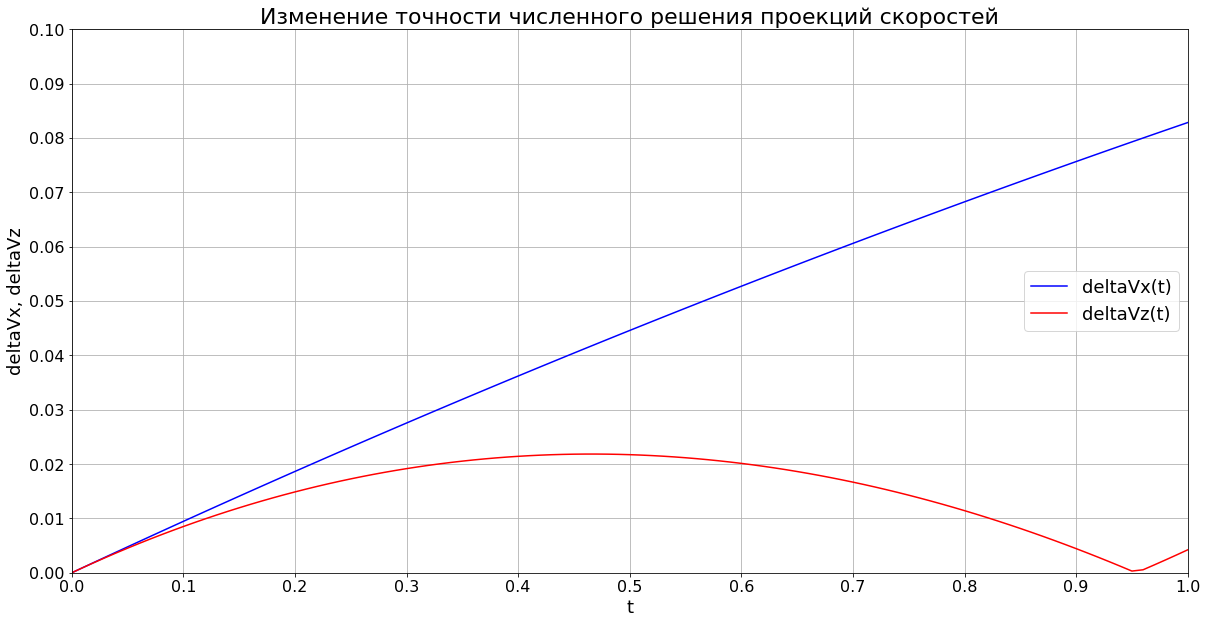

In [31]:
# График точности численного решения проекций скоростей Vx(t), Vz(t)
xlim_min = 0.0
xlim_max = 1.0
ylim_min = 0.0
ylim_max = 0.1
t = range(points)
t = [t[i]/(points-1) for i in range(len(t))]
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Изменение точности численного решения проекций скоростей', fontsize = 22)
plt.xlabel('t', fontsize = 18)
plt.ylabel('deltaVx, deltaVz', fontsize = 18)
plt.grid(True)
plt.plot(t, deltaVx, c = 'blue')
plt.plot(t, deltaVz, c = 'red')
plt.legend(['deltaVx(t)', 'deltaVz(t)'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 11), fontsize = 16);